In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
import warnings
warnings.filterwarnings("ignore")

##PART1(10MARKS)

In [2]:
df1=pd.read_csv("advertising.csv")

In [3]:
df1

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


In [4]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9


In [5]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)

In [9]:
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


##QUESTION1

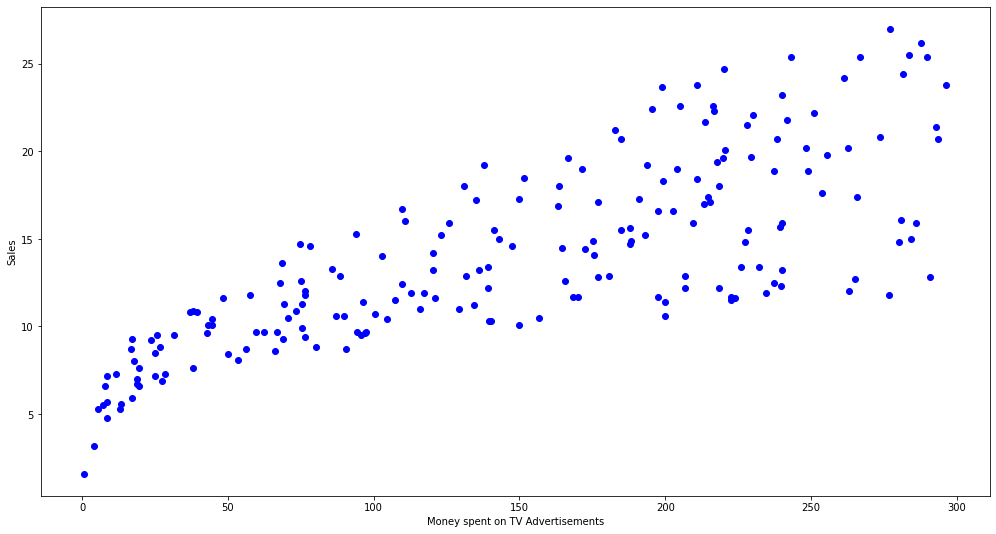

In [12]:
plt.figure(figsize=(17, 9))
plt.scatter(df1['TV'],df1['Sales'],c='blue')
plt.xlabel("Money spent on TV Advertisements")
plt.ylabel("Sales")
plt.show()

In [13]:
import seaborn as sns

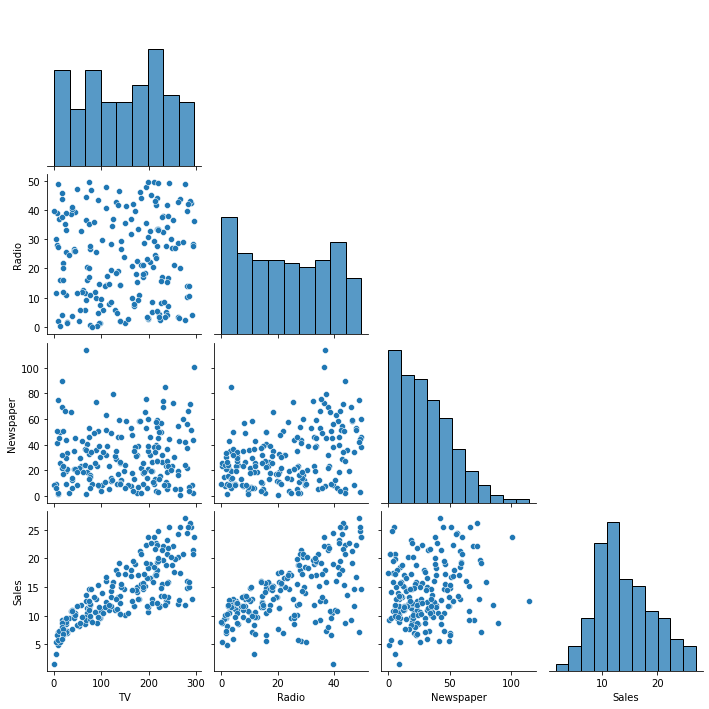

In [18]:
sns.pairplot(df1, corner=True)

In [59]:
x = df1.corr();
x

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


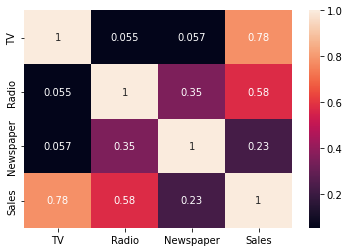

In [61]:
sns.heatmap(x, annot=True)

##QUESTION2

In [19]:
from sklearn.linear_model import LinearRegression

###Since splitting of training and testing data is not specified in the question train test split is ignored for this model.

In [20]:
X = df1['TV'].values.reshape(-1,1)
y = df1['Sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [24]:
print("The coefficient of the model are as follows:")
print(reg.coef_[0][0])
print(reg.intercept_[0])
print("The fitted line equation is :")
print(" Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The coefficient of the model are as follows:
0.04753664043301975
7.032593549127695
The fitted line equation is :
 Y = 7.0326 + 0.047537X


##QUESTION3 AND 4


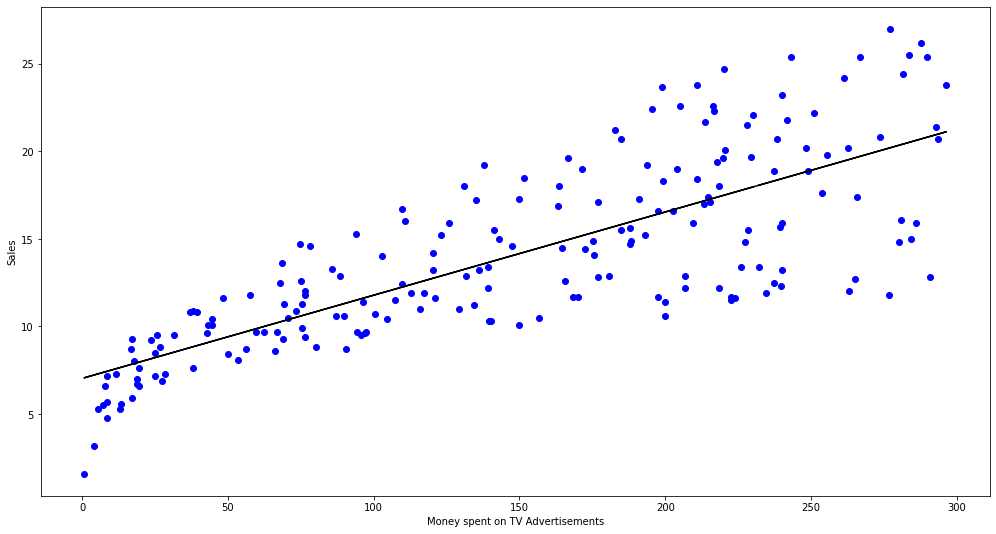

In [25]:
lrpredict = reg.predict(X)

plt.figure(figsize=(17, 9))
plt.scatter(df1['TV'], df1['Sales'],c='blue')
plt.plot(df1['TV'],lrpredict,c='black')
plt.xlabel("Money spent on TV Advertisements")
plt.ylabel("Sales")
plt.show()

##QUESTION5


In [26]:
import statsmodels.api as sm

In [27]:
Y = df1['Sales']
X = df1['TV']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


const    7.032594
TV       0.047537
dtype: float64

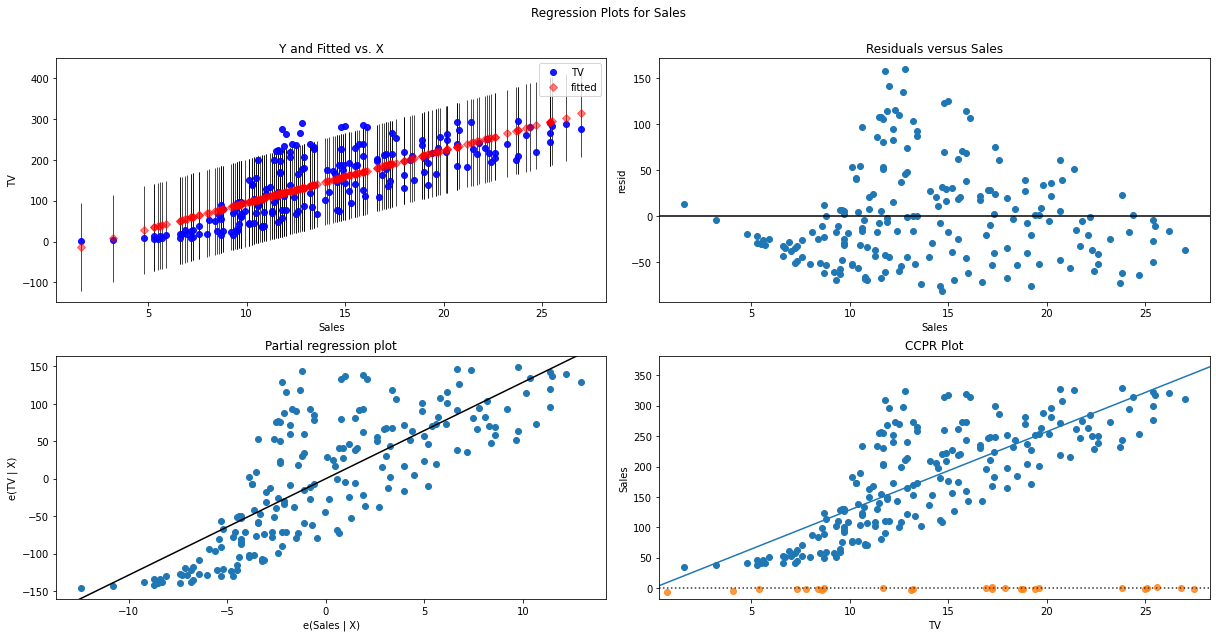

In [64]:
from statsmodels.formula.api import ols
ols_model = ols('TV~Sales',data=df1).fit()
fig = plt.figure(figsize=(17, 9))
fig = sm.graphics.plot_regress_exog(ols_model,'Sales',fig=fig)
sns.residplot(x='TV', y='Sales', data=df1)
plt.show()

##INFERENCE

As we can see the plots are scattered away from the fitted line.This tells us that there is considerable amount of heteroscedasticity in this plot.This will yield a high residual error when computed.

##PART 2

###QUESTION1

In [46]:
df2 = pd.read_csv("pima-indians-diabetes.csv",names=['a', 'b', 'c','d','e','f','g','h','i'],header=None)

In [47]:
df2.head()

,a,b,c,d,e,f,g,h,i
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
ind_col = ['a', 'b', 'c','d','e','f','g','h']
X = df2[ind_col] 
y = df2['i']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

##QUESTION2

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##QUESTION3

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
prediction = classifier.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##QUESTION4

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))

[[93 14]
 [17 30]]


In [55]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



##QUESTION5

In [56]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

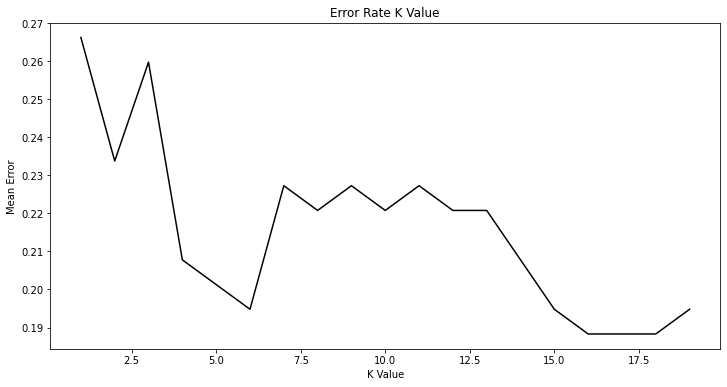

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='black')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')